In [2]:
#Generic
import pandas as pd, numpy as np, seaborn as sns, matplotlib.pyplot as plt, joblib
from scipy.stats import zscore

#Encode
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

#Skewness
from sklearn.preprocessing import PowerTransformer

#Normalize
from sklearn.preprocessing import MinMaxScaler

#Impute
from sklearn.impute import SimpleImputer

#Decomposition
from sklearn.decomposition import PCA

#Train Test Split
from sklearn.model_selection import train_test_split

#Metrics
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.metrics import accuracy_score,roc_curve,auc,classification_report,confusion_matrix

#CrossVal
from sklearn.model_selection import cross_val_score

#RegressionModels
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR,LinearSVR
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

#ClassificationModels
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,BaggingClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

#Optimization
from sklearn.model_selection import GridSearchCV

#Deeplearning
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [3]:
#Import Data
df=pd.read_excel('Final_Train.xlsx')

In [4]:
#Check head
df.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


In [5]:
#Check Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Qualification       5961 non-null   object
 1   Experience          5961 non-null   object
 2   Rating              2659 non-null   object
 3   Place               5936 non-null   object
 4   Profile             5961 non-null   object
 5   Miscellaneous_Info  3341 non-null   object
 6   Fees                5961 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 326.1+ KB


In [6]:
#Check missing values
df.isna().sum()

Qualification            0
Experience               0
Rating                3302
Place                   25
Profile                  0
Miscellaneous_Info    2620
Fees                     0
dtype: int64

In [7]:
df.describe()

,Fees
count,5961.000000
mean,307.944640
std,190.920373
min,5.000000
25%,150.000000
50%,300.000000
75%,500.000000
max,950.000000


In [8]:
df['Rating'].value_counts().head()

100%    684
98%     290
99%     259
97%     241
96%     220
Name: Rating, dtype: int64

In [9]:
def rat_impute(x):
    if pd.isnull(x):
        return x
    else:
        return int(x[:x.find('%')])

In [10]:
df['Rating']=df.apply(lambda x:rat_impute(x['Rating']),axis=1)

In [11]:
df['Rating'].value_counts().head()

100.0    684
98.0     290
99.0     259
97.0     241
96.0     220
Name: Rating, dtype: int64

In [12]:
si=SimpleImputer(strategy='mean')

In [13]:
df['Rating']=si.fit_transform(df['Rating'].values.reshape(-1,1))

In [14]:
df['Qualification']

0                BHMS, MD - Homeopathy
1         BAMS, MD - Ayurveda Medicine
2       MBBS, MS - Otorhinolaryngology
3                  BSc - Zoology, BAMS
4                                 BAMS
                     ...              
5956                    MBBS, MS - ENT
5957                              MBBS
5958                              MBBS
5959       MBBS, MD - General Medicine
5960           BDS, MDS - Orthodontics
Name: Qualification, Length: 5961, dtype: object

In [15]:
df['Qualification'].unique()

array(['BHMS, MD - Homeopathy', 'BAMS, MD - Ayurveda Medicine',
       'MBBS, MS - Otorhinolaryngology', ...,
       'MD - Dermatology , Venereology & Leprosy, MBBS, Fellowship In Dermatosurgery',
       'BDS, certification in smile designing',
       'MD - Homeopathy, Post Graduate Diploma in Healthcare Management(PGDHM), DHMS (Diploma in Homeopathic Medicine and Surgery)'],
      dtype=object)

In [16]:
df['Qualification'].nunique()

1420

In [17]:
def qual_impute1(x):
    if ',' in x:
        return x[:x.find(',')].strip()
    else:
        return x

In [18]:
df['Qualification_Degree']=df.apply(lambda x:qual_impute1(x['Qualification']),axis=1)

In [19]:
df['Qualification_Degree'].nunique()

150

In [20]:
df['Qualification_Degree'].value_counts()

MBBS                                             2448
BDS                                              1208
BAMS                                              711
BHMS                                              706
MD - Dermatology                                  146
                                                 ... 
DNB - Orthopedics/Orthopedic Surgery                1
Certified In Panchkarma                             1
FAGE                                                1
MRCPCH (UK)                                         1
Fellowship In Laryngology Bronchoesophagology       1
Name: Qualification_Degree, Length: 150, dtype: int64

In [21]:
def qual_impute2(x):
    if '-' in x:
        return x[:x.find('-')].strip()
    else:
        return x

In [22]:
df['Qualification_Degree']=df.apply(lambda x:qual_impute2(x['Qualification_Degree']),axis=1)

In [23]:
df['Qualification_Degree']=df['Qualification_Degree'].apply(lambda x:x.upper())

In [24]:
df['Qualification_Degree'].value_counts()

MBBS                                         2448
BDS                                          1208
BAMS                                          711
BHMS                                          706
MD                                            327
                                             ... 
DIPLOMATE OF NATIONAL BOARD EXAM                1
MEMBER OF THE ROYAL COLLEGE OF PHYSICIANS       1
D.H.M                                           1
FELLOWSHIP IN CLINICAL COSMETOLOGY              1
GRADUATE DIPLOMA IN FAMILY MEDICINE             1
Name: Qualification_Degree, Length: 94, dtype: int64

In [25]:
df['Qualification_Degree'].nunique()

94

In [26]:
df['Qualification_Degree'].unique()

array(['BHMS', 'BAMS', 'MBBS', 'BSC', 'BDS', 'MDS',
       'DIPLOMA IN DERMATOLOGY', 'DM', 'MD',
       'GET INSPIRED BY REMARKABLE STORIES OF PEOPLE LIKE YOU', 'PHD',
       'MRCPS', 'MS', 'DDVL',
       'DHMS (DIPLOMA IN HOMEOPATHIC MEDICINE AND SURGERY)', 'GCEH',
       'POST GRADUATE DIPLOMA IN HEALTHCARE MANAGEMENT(PGDHM)', 'DNB',
       'CERTIFICATION IN AESTHETIC DENTISTRY',
       'FELLOWSHIP IN LARYNGOLOGY BRONCHOESOPHAGOLOGY', 'FAGE',
       'FELLOWSHIP IN AESTHETIC MEDICINE', 'BSAM',
       'DIPLOMA IN FAMILY MEDICINE (DFM)', 'FNB',
       'POST GRADUATE DIPLOMA IN DERMOTOLOGY (PGDD)',
       'CERTIFICATE OF ORAL IMPLANTOLOGY', 'CERTIFIED IN PANCHKARMA',
       '39 YEARS EXPERIENCE', 'LCEH',
       'DOCTOR OF HOMEOPATHIC MEDICINE (HMD)',
       'DIPLOMA IN CHILD HEALTH (DCH)',
       'DIPLOMA IN OTORHINOLARYNGOLOGY (DLO)',
       'DIPLOMATE OF NATIONAL BOARD EXAM', 'MSC',
       'FELLOWSHIP AND DIPLOMATE IN IMPLANTOLOGY FROM ICOI (USA)',
       'POST DOCTORAL FELLOWSHIP IN D

In [27]:
df.shape

(5961, 8)

In [28]:
df.loc[df['Qualification_Degree'].str.contains('DIPLOMA'),'Qualification_Degree']='DIPLOMA'

In [29]:
df.loc[df['Qualification_Degree'].str.contains('DIPLOMA')].head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,Qualification_Degree
29,"Diploma in Dermatology, MBBS",15 years experience,97.000000,"Defence Colony, Delhi",Dermatologists,"97% 60 Feedback Defence Colony, Delhi",500,DIPLOMA
155,DHMS (Diploma in Homeopathic Medicine and Surg...,35 years experience,100.000000,"T Nagar, Chennai",Homeopath,"100% 4 Feedback T Nagar, Chennai",500,DIPLOMA
192,DHMS (Diploma in Homeopathic Medicine and Surg...,27 years experience,94.643475,"Indiranagar, Bangalore",Homeopath,NaN,500,DIPLOMA
231,DHMS (Diploma in Homeopathic Medicine and Surg...,37 years experience,94.643475,"Kodambakkam, Chennai",Homeopath,NaN,200,DIPLOMA
236,Post Graduate Diploma in Healthcare Management...,40 years experience,94.643475,"Secunderabad, Hyderabad",General Medicine,NaN,500,DIPLOMA


In [30]:
df['Qualification_Degree'].value_counts()

MBBS                                             2448
BDS                                              1208
BAMS                                              711
BHMS                                              706
MD                                                327
                                                 ... 
DNHE                                                1
FRGUHS                                              1
MBA                                                 1
FRCP                                                1
FELLOWSHIP IN LARYNGOLOGY BRONCHOESOPHAGOLOGY       1
Name: Qualification_Degree, Length: 75, dtype: int64

In [31]:
df['Qualification_Degree'].nunique()

75

In [32]:
# df=df[df['Qualification_Degree'].str.len()<10]

In [33]:
df.shape

(5961, 8)

In [34]:
for x in df['Qualification_Degree'].value_counts().index.tolist():
    if df[df['Qualification_Degree']==x].count()['Qualification_Degree']<10:
        df=df[df['Qualification_Degree']!=x]

In [35]:
df.shape

(5850, 8)

In [36]:
df['Qualification_Degree'].unique()

array(['BHMS', 'BAMS', 'MBBS', 'BDS', 'MDS', 'DIPLOMA', 'MD',
       'GET INSPIRED BY REMARKABLE STORIES OF PEOPLE LIKE YOU', 'MS',
       'DDVL', 'DNB', 'LCEH'], dtype=object)

In [37]:
df=df[df['Qualification_Degree']!='GET INSPIRED BY REMARKABLE STORIES OF PEOPLE LIKE YOU']

In [38]:
df.shape

(5826, 8)

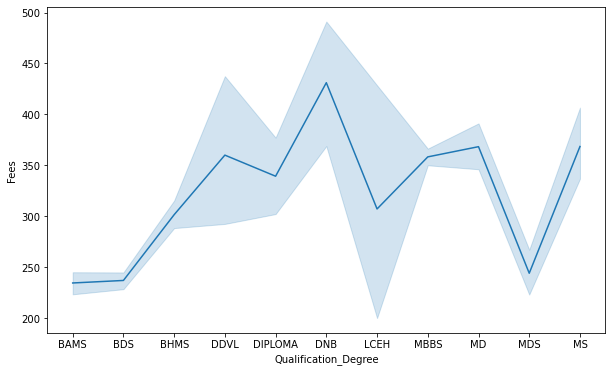

In [39]:
plt.figure(figsize=(10,6))
sns.lineplot(x='Qualification_Degree',y='Fees',data=df)
plt.show()

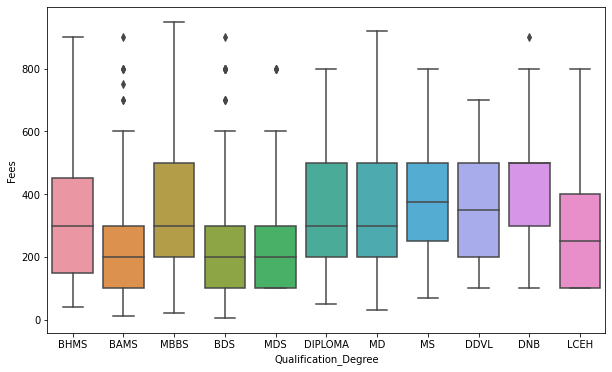

In [40]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Qualification_Degree',y='Fees',data=df)
plt.show()

In [41]:
# le=LabelEncoder()

In [42]:
# df['Qualification_Degree']=le.fit_transform(df['Qualification_Degree'])

In [43]:
df=pd.concat([df.drop('Qualification_Degree',axis=1),pd.get_dummies(df['Qualification_Degree'])],axis=1)

In [44]:
df=df.drop('Qualification',axis=1)

In [45]:
# df=df.drop('Qualification',axis=1)
# df=df.drop('Qualification_Degree',axis=1)

In [46]:
df['Experience']=df['Experience'].apply(lambda x:int(x[:x.find('y')].strip()))

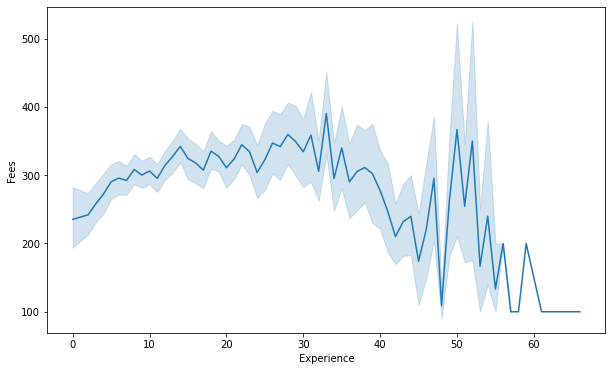

In [47]:
plt.figure(figsize=(10,6))
sns.lineplot(x='Experience',y='Fees',data=df)
plt.show()

In [48]:
df['Place'].value_counts()

HSR Layout, Bangalore            73
Andheri West, Mumbai             69
Dwarka, Delhi                    66
Banjara Hills, Hyderabad         63
Borivali West, Mumbai            52
                                 ..
Jagriti Enclave, Delhi            1
e                                 1
TVM Fort, Thiruvananthapuram      1
Changampuzha Nagar, Ernakulam     1
Rohini Sector 24, Delhi           1
Name: Place, Length: 866, dtype: int64

In [49]:
# def plac_impute1(x):
#     if pd.isnull(x) == True:
#         return x
#     else:
#         return x[:x.find(',')].strip()

In [50]:
# df['Locality']=df.apply(lambda x : plac_impute1(x['Place']),axis=1)

In [51]:
def plac_impute2(x):
    if pd.isnull(x) == True:
        return x
    else:
        return x[x.find(',')+1:].strip()

In [52]:
df['Place']=df.apply(lambda x : plac_impute2(x['Place']),axis=1)

In [53]:
df['Place'].value_counts()

Bangalore             1236
Mumbai                1192
Delhi                 1160
Hyderabad              938
Chennai                841
Coimbatore             223
Ernakulam              149
Thiruvananthapuram      84
Sector 5, Delhi          1
e                        1
Name: Place, dtype: int64

In [54]:
df[df['Place']=='e']

,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,BAMS,BDS,BHMS,DDVL,DIPLOMA,DNB,LCEH,MBBS,MD,MDS,MS
3980,23,94.643475,e,Dentist,NaN,250,0,1,0,0,0,0,0,0,0,0,0


In [55]:
df=df.drop(index=3980,axis=0)

In [56]:
df['Place']=df['Place'].replace('Sector 5, Delhi','Delhi')

In [57]:
df['Place'].value_counts()

Bangalore             1236
Mumbai                1192
Delhi                 1161
Hyderabad              938
Chennai                841
Coimbatore             223
Ernakulam              149
Thiruvananthapuram      84
Name: Place, dtype: int64

In [58]:
df['Place'].isna().sum()

1

In [59]:
df.shape

(5825, 17)

In [60]:
df=df.drop('Miscellaneous_Info',axis=1)

In [61]:
df.isna().sum()

Experience    0
Rating        0
Place         1
Profile       0
Fees          0
BAMS          0
BDS           0
BHMS          0
DDVL          0
DIPLOMA       0
DNB           0
LCEH          0
MBBS          0
MD            0
MDS           0
MS            0
dtype: int64

In [62]:
df.shape

(5825, 16)

In [63]:
df=df.dropna()

In [64]:
df.shape

(5824, 16)

In [65]:
si=SimpleImputer(strategy='most_frequent')

In [66]:
# df.loc[:,'Place']=si.fit_transform(df['Place'].values.reshape(-1,1))

In [67]:
df['Profile'].value_counts()

Dentist             1376
General Medicine    1145
Dermatologists       992
Homeopath            827
Ayurveda             765
ENT Specialist       719
Name: Profile, dtype: int64

In [68]:
# df=df.drop('Miscellaneous_Info',axis=1)

In [69]:
df.select_dtypes('object').columns

Index(['Place', 'Profile'], dtype='object')

In [70]:
# df['Place']=le.fit_transform(df['Place'])

In [71]:
# df['Profile']=le.fit_transform(df['Profile'])

In [72]:
df=pd.concat([df.drop('Place',axis=1),pd.get_dummies(df['Place'])],axis=1)

In [73]:
df=pd.concat([df.drop('Profile',axis=1),pd.get_dummies(df['Profile'])],axis=1)

In [74]:
df.shape

(5824, 28)

In [75]:
zs=zscore(df)
df=df[((zs<3) & (zs>-3)).all(axis=1)]

In [76]:
df.shape

(4506, 28)

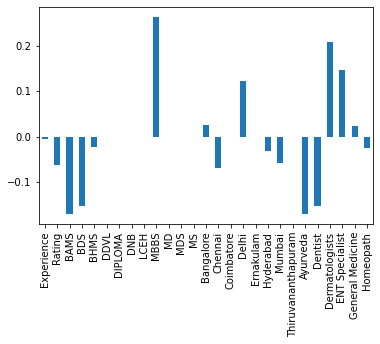

In [77]:
df.corr()['Fees'].drop('Fees').plot(kind='bar')

In [78]:
df.corr()['Fees'].drop('Fees').sort_values(ascending=False)

MBBS                  0.263580
Dermatologists        0.207099
ENT Specialist        0.146601
Delhi                 0.121835
Bangalore             0.024694
General Medicine      0.022518
Experience           -0.005565
BHMS                 -0.021746
Homeopath            -0.024571
Hyderabad            -0.031296
Mumbai               -0.058083
Rating               -0.063110
Chennai              -0.068162
Dentist              -0.152490
BDS                  -0.152490
Ayurveda             -0.170477
BAMS                 -0.171081
DDVL                       NaN
DIPLOMA                    NaN
DNB                        NaN
LCEH                       NaN
MD                         NaN
MDS                        NaN
MS                         NaN
Coimbatore                 NaN
Ernakulam                  NaN
Thiruvananthapuram         NaN
Name: Fees, dtype: float64

In [79]:
df=df.drop(['DDVL','DIPLOMA','DNB','LCEH','LCEH','MD','MDS','MS','Coimbatore','Ernakulam','Thiruvananthapuram'],axis=1)

In [80]:
df.skew()

Experience          0.898015
Rating             -1.378904
Fees                0.667313
BAMS                1.948668
BDS                 1.387587
BHMS                1.951086
MBBS                0.068416
Bangalore           1.245927
Chennai             1.878098
Delhi               1.381199
Hyderabad           1.702270
Mumbai              1.390792
Ayurveda            1.951086
Dentist             1.387587
Dermatologists      1.839703
ENT Specialist      2.374645
General Medicine    1.480183
Homeopath           1.936644
dtype: float64

In [81]:
pt=PowerTransformer()

In [82]:
df.shape

(4506, 18)

In [83]:
for x in df.columns.drop('Fees'):
    if abs(df.loc[:,x].skew())>0.55:
        df.loc[:,x]=pt.fit_transform(df.loc[:,x].values.reshape(-1,1))

In [84]:
df.skew()

Experience         -0.001474
Rating              0.107584
Fees                0.667313
BAMS                1.948668
BDS                 1.387587
BHMS                1.951086
MBBS                0.068416
Bangalore           1.245927
Chennai             1.878098
Delhi               1.381199
Hyderabad           1.702270
Mumbai              1.390792
Ayurveda            1.951086
Dentist             1.387587
Dermatologists      1.839703
ENT Specialist      2.374645
General Medicine    1.480183
Homeopath           1.936644
dtype: float64

In [85]:
X=df.drop('Fees',axis=1)
y=df['Fees']

In [86]:
def model_sel(mod):
    maxscore=0
    maxstate=0
    for x in range(42,105):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=x)
        model=mod()
        model.fit(X_train,y_train)
        predict=model.predict(X_test)
        r2score=r2_score(y_test,predict)
        if r2score>maxscore:
            maxscore=r2score
            maxstate=x
    print("Max Score is {} at max state {}".format(maxscore,maxstate))

In [87]:
model_sel(LinearRegression)

Max Score is 0.13784392030415316 at max state 55


In [88]:
model_sel(Lasso)

Max Score is 0.13649767645566646 at max state 99


In [89]:
model_sel(Ridge)

Max Score is 0.13781900340237485 at max state 55


In [90]:
model_sel(ElasticNet)

Max Score is 0.1237568249786698 at max state 99


In [91]:
model_sel(KNeighborsRegressor)

Max Score is 0.0780761332083616 at max state 96


In [92]:
model_sel(DecisionTreeRegressor)

Max Score is 0 at max state 0


In [93]:
model_sel(RandomForestRegressor)

Max Score is 0.013308432857215835 at max state 100


In [94]:
model_sel(SVR)

Max Score is 0.08424937657242815 at max state 65


In [95]:
model_sel(AdaBoostRegressor)

Max Score is 0.13797774571418564 at max state 55


In [96]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=55)

In [97]:
ad=AdaBoostRegressor()
ad.fit(X_train,y_train)
predict=ad.predict(X_test)

In [98]:
param={'n_estimators':[50,80,100,120,150,170,230,250,270,310]}
gscv=GridSearchCV(AdaBoostRegressor(),param)

In [411]:
# gscv.fit(X_train,y_train)

GridSearchCV(estimator=AdaBoostRegressor(),
             param_grid={'n_estimators': [50, 80, 100, 120, 150, 170, 230, 250,
                                          270, 310]})

In [407]:
# gscv.best_params_

{'n_estimators': 150}

In [412]:
# ad=AdaBoostRegressor(n_estimators=50)
# ad.fit(X_train,y_train)
# predict=ad.predict(X_test)

In [99]:
mean_absolute_error(y_test,predict)

143.38054067207182

In [101]:
np.sqrt(mean_squared_error(y_test,predict))

174.38555053955656

In [102]:
#Save the model
joblib.dump(ad,"Doctor's consultation fees ad.obj")

["Doctor's consultation fees ad.obj"]